In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
#import label encoder
from sklearn import preprocessing

In [84]:
df = pd.read_csv("Car details v3.csv")
print(df.head())

# show the number of missing values in each column
print(df.isnull().sum())
# show the shape of the dataframe
print(df.shape)
# show the data types of each column
print(df.dtypes)

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [85]:
#drop the rows with missing values
df = df.dropna()


In [86]:
df.head()

#only keep the first word of the car name
df['name'] = df['name'].apply(lambda x: x.split(' ')[0])
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [87]:
# change the name of name column to make
df = df.rename(columns={'name': 'manufacturer'})

In [88]:
df.head()

,manufacturer,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [90]:
# transform the categorical data into numbers with label encoder
le = preprocessing.LabelEncoder()
df['manufacturer'] = le.fit_transform(df['manufacturer'])
df['year'] = le.fit_transform(df['year'])
df['selling_price'] = le.fit_transform(df['selling_price'])
df['km_driven'] = le.fit_transform(df['km_driven'])
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])



In [91]:
df.head()


,manufacturer,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,20,20,276,763,1,1,1,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,26,20,223,715,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,10,12,90,752,3,1,1,4,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,11,16,131,730,1,1,1,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,20,13,70,715,3,1,1,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [92]:
# make the mileage column numeric
df['mileage'] = df['mileage'].str.replace('kmpl', '')
df['mileage'] = df['mileage'].str.replace('km/kg', '')
df['mileage'] = df['mileage'].astype(float)

# make the engine column numeric
df['engine'] = df['engine'].str.replace('CC', '')
df['engine'] = df['engine'].astype(float)

# make the max_power column numeric
df['max_power'] = df['max_power'].str.replace('bhp', '')
df['max_power'] = df['max_power'].astype(float)

# show the data types of each column
print(df.dtypes)

manufacturer       int64
year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object


In [94]:
#drop the name and torque columns
df = df.drop(['torque'], axis=1)



KeyError: "['torque'] not found in axis"

In [95]:
df.head()

,manufacturer,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,20,276,763,1,1,1,0,23.40,1248.0,74.00,5.0
1,26,20,223,715,1,1,1,2,21.14,1498.0,103.52,5.0
2,10,12,90,752,3,1,1,4,17.70,1497.0,78.00,5.0
3,11,16,131,730,1,1,1,0,23.00,1396.0,90.00,5.0
4,20,13,70,715,3,1,1,0,16.10,1298.0,88.20,5.0


In [ ]:
y = df['selling_price']
x = df.drop('selling_price', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.448252,0.004158,1.392523,-0.887058,0.277395,0.389408,-0.655358,0.986157,-0.418188,-0.492024,-0.434128
1,1.010771,0.004158,1.184569,-0.887058,0.277395,0.389408,1.003442,0.426198,0.077980,0.333827,-0.434128
2,-1.207106,-2.066530,1.344867,1.110117,0.277395,0.389408,2.662242,-0.426129,0.075995,-0.380120,-0.434128
3,-0.510113,-1.031186,1.249555,-0.887058,0.277395,0.389408,-0.655358,0.887050,-0.124457,-0.044408,-0.434128
4,0.525907,-1.807694,1.184569,1.110117,0.277395,0.389408,-0.655358,-0.822561,-0.318955,-0.094765,-0.434128


# Split der Daten in Training- und Testsets

In [96]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# convert the dataframes to tensors
x_train = torch.tensor(x_train.values).float()
x_test = torch.tensor(x_test.values).float()
y_train = torch.tensor(y_train.values).float()
y_test = torch.tensor(y_test.values).float()


# Erstellung des Modells 

In [98]:
class MySimpleNN(torch.nn.Module):   # MySimpleNN erbt von torch.nn.Module

     # Konstruktor
    def __init__(self):
        # Aufruf des Superkonstruktors von torch.nn.Module
        super(MySimpleNN, self).__init__()
        # Definition der Schichten

        # fc1 --> fully connected layer 1 von 12 auf 70 Neuronen
        # warum 12? --> 12 Features
        self.fc1 = torch.nn.Linear(11, 70)
        # fc2 --> fully connected layer 2 von 70 auf 120 Neuronen
        self.fc2 = torch.nn.Linear(70, 120)
        # fc3 --> fully connected layer 3 von 120 auf 30 Neuronen
        self.fc3 = torch.nn.Linear(120, 30)
        # fc4 --> fully connected layer 4 von 30 auf 1 Neuronen
        # Warum 1 Neuron? --> 1 Output, wir lesen da den Alkoholgehahlt aus
        self.fc4 = torch.nn.Linear(30, 1)

        # Batch Normalization
        # 70, 120, 30 sind die Anzahl der Neuronen in den Schichten
        self.bn1 = torch.nn.BatchNorm1d(70)
        self.bn2 = torch.nn.BatchNorm1d(120)
        self.bn3 = torch.nn.BatchNorm1d(30)


    # forward Methode -> Forward Propagation
    # wenn ich später ein Objekt von MySimpleNN erzeuge, dann kann ich
    # dieses Objekt mit einem Tensor aufrufen, dann wird die forward Methode
    # aufgerufen. z.B. model(x_train)
    def forward(self, xb):   # xb steht für eine Batch von X-Werten
        #print("xb", xb.shape)
        z2 = self.fc1(xb)  # dahinter steckt x@w1 + b1
        a2 = torch.relu(z2)    # alle negativen Werte werden auf 0 gesetzt, der Rest bleibt
        #print("a2", a2.shape)
        a2_bn = self.bn1(a2) # Normalisierung der Werte auf den Neuronen
        #print("a2_bn", a2_bn.shape)
        z3 = self.fc2(a2_bn) # dahinter steckt a2@w2 + b2
        #print("z3", z3.shape)
        a3 = torch.relu(z3)
        #print("a3", a3.shape)
        a3_bn = self.bn2(a3)
        #print("a3_bn", a3_bn.shape)
        z4 = self.fc3(a3_bn)
        #print("z4", z4.shape)
        a4 = torch.relu(z4)
        #print("a4", a4.shape)
        a4_bn = self.bn3(a4)
        #print("a4_bn", a4_bn.shape)
        y_hat = torch.relu(self.fc4(a4_bn))
        #print("y_hat", y_hat.shape)
        return y_hat

# Training 

In [99]:
def get_batch(x, y, batch_size):
    for i in range(0, len(x), batch_size):
        # yield: gibt den Wert zurück, aber merkt sich den aktuellen Zustand
        yield x[i:i+batch_size], y[i:i+batch_size]

# Eigenes Modell 

/home/codespace/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/codespace/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([180])) that is different to the input size (torch.Size([180, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


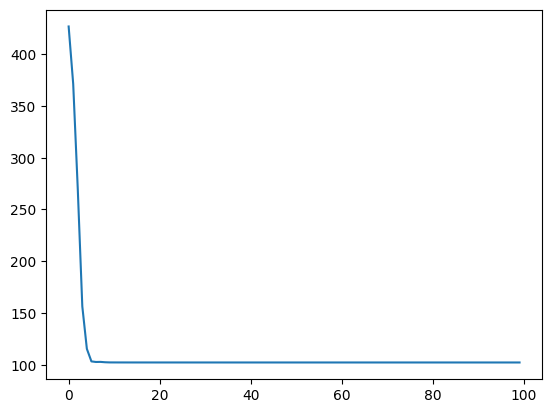

Bad pipe message: %s [b'\x86\xdc\x8c\x07\xb8>eo\x95\xb0 \xe9\x94\xd3\xd8$a\xc3 \xb4\x02\xec=::\x87;\xf4\xbc\xa4\xf2\x19\x00\x0em\x9a\xb3\x87-\xe6J%z\xf9\xf1D\x7fD\x86\x12S\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 ', b'\x96\xf2(h\x08\x0c', b'W\xc4\xdb[\xc9\xa9~\xc2<\x1a9K\xa9\xbd']
Bad pipe message: %s [b'\x08!^\x19\x92\xack\x99>\x84\xcb\xc1\xee4{u\xe8\\ \x15\xfa\xb9\xde\x97h{]\xc3\x883\xbdv\xaa.\xdbZ\xf1\xa3G\x8f\xbd\xac\x8ap\xcb_\xc7e>Q-\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\

In [102]:
# eigenes Modell wird erstellt
model = MySimpleNN()
lr=0.0001
# trainiere immer mit 256 Datensätzen auf einmal
batch_size=256

# loss function
# Mean Squared Error
# die Lossfunction von Pytorch müssen erstmal erstellt werden mit ()
loss_fn = torch.nn.MSELoss()

def train(xb, yb):
    y_hat=model(xb)
    loss = loss_fn(y_hat, yb)
    loss.backward()
    with torch.no_grad():
        # Iteration über alle Parameter im Modell
        for param in model.parameters():
            # Backpropagation, d.h. die Veränderung der Gewichte in Abhängigkeit der Ableitung
            param -= lr * param.grad
        # Alle Gradients im Modell werden auf 0 gesetzt
        model.zero_grad()
    return loss.item()

losses=[]
# import tqdm notebook
for epoch in (range(100)):
    loss_sum=0
    # Iteration über alle Batches
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_sum += train(xb, yb)
    losses.append(loss_sum/len(x_train))

#plot
import matplotlib.pyplot as plt
plt.plot(losses)